## Librerias y Funciones

In [20]:
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
from Functions import Correlations
#import plotly.express as px
#import plotly.graph_objects as go

### APERTURA DE ARCHIVO

In [21]:
df = pd.read_csv('Hotel_Reservations_clean.csv')
#df.info()

## EDA

### Analisis de correlaciones

En esta seccion perteneciente al ***EDA*** se analizaran las correlaciones de todas las variables contra la variable objetivo ***booking_status_id***, esta representa la dicotomia de la variable ***booking_status*** de manera numerica para poder utilizar los metodos de correlacion.

#### Separacion de variables segun su tipo

In [22]:
numeric_var = [ 'num_adults','num_children','total_guests','weekend_nights',
                'week_nights','total_nights','lead_time','num_prev_cancellations',
                'num_prev_not_canceled', 'avg_price_room', 'num_sp_requests']

nominal_var = ['repeated_guest', 'car_parking', 'arrival_season_cod', 'mkt_segment_cod']

ordinal_var = ['meal_plan_cod','room_type_cod']

#### Matriz de correlacion (Pearson)

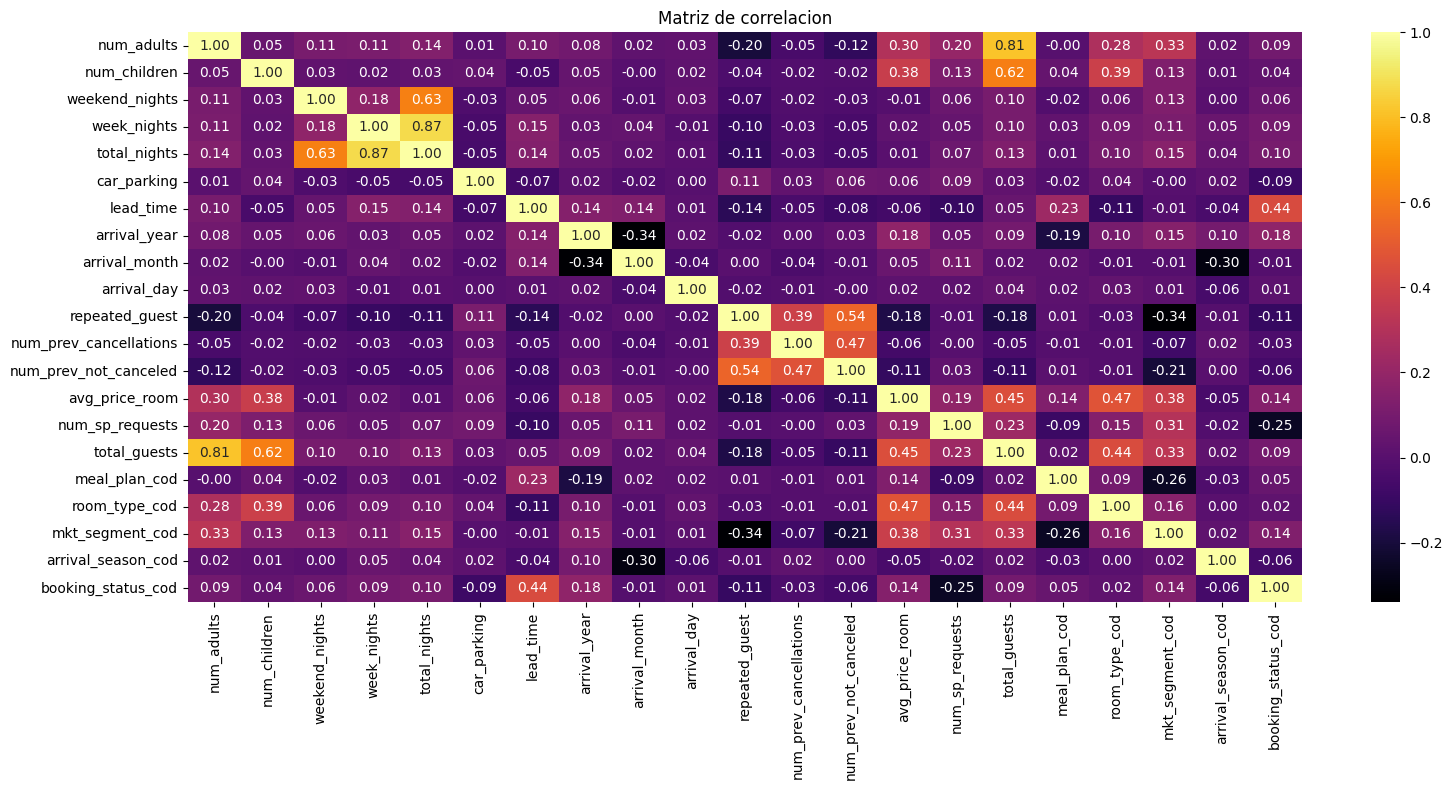

In [23]:
#GRAFICO MATRIZ DE CORRELACION
matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16,8))
sns.heatmap(matrix, fmt='.2f', annot=True, cmap='inferno')
plt.title('Matriz de correlacion')
plt.tight_layout()
plt.show()

#### Correlacion de variable ***booking_status*** con variables cuantitativas y ordinales

Se utiliza el ***coeficiente de correlacion punto biserial*** para determinar la relacion entre las variables cuantitativas y la variable de interes ***booking_status*** que es de tipo nominal dicotomica.

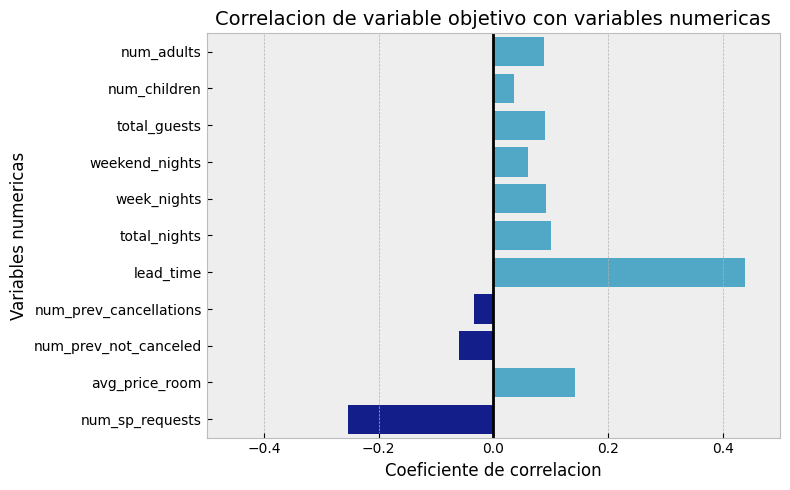

In [24]:
#GRAFICO DE CORRELACIONES DE PUNTO BISERIAL
Correlations(df, 'booking_status_cod', numeric_var, 'numericas').plot_biserial_point()

#### Correlacion de variable objetivo ***booking_status*** con variables de origen nominal

Se utiliza la ***coeficiente de contingencia*** para determinar la relacion entre las variables nominales y la variable de interes ***booking_status*** que es de tipo nominal dicotomica. Para ello se obtiene el estadisitico de prueba ***Chi cuadrado*** utilizando la libreria ***scipy*** para posteriormente obtener el coeficiente con la formula que se muestra acontinuacion:
$$
C = \sqrt{\frac{x^2}{N+x^2}}
$$
X²: Estadistico Chi²<br>
N: Cantidadad de observaciones totales<br>
C: coeficiente de contingencia<br>

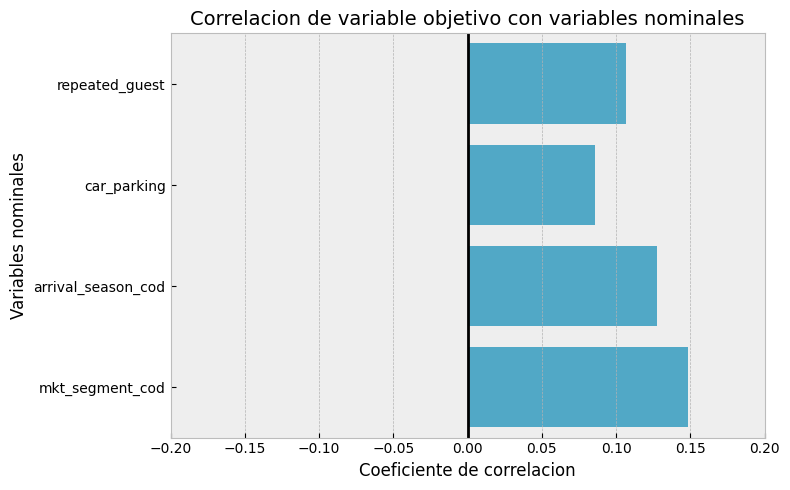

In [25]:
#GRAFICO DE COEFICIENTES DE CONTINGENCIA
Correlations(df, 'booking_status_cod', nominal_var, 'nominales').plot_contingency_coef()

### Graficos de exploracion

#### Comportamiento de la reservas

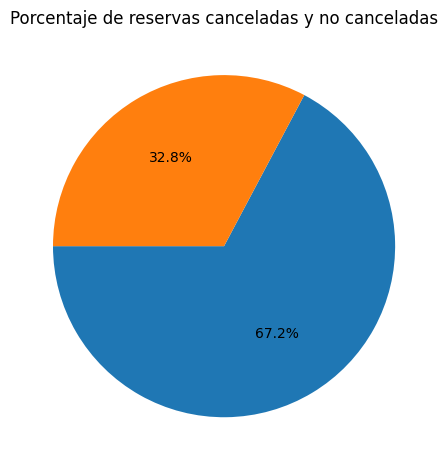

In [26]:
#GRAFICO DE TORTA RESERVAS CANCELADAS Y NO CANCELADAS
count = df.booking_status.value_counts()
plt.pie(count, autopct='%1.1f%%', startangle=180)
plt.title('Porcentaje de reservas canceladas y no canceladas')

plt.tight_layout()
plt.show()

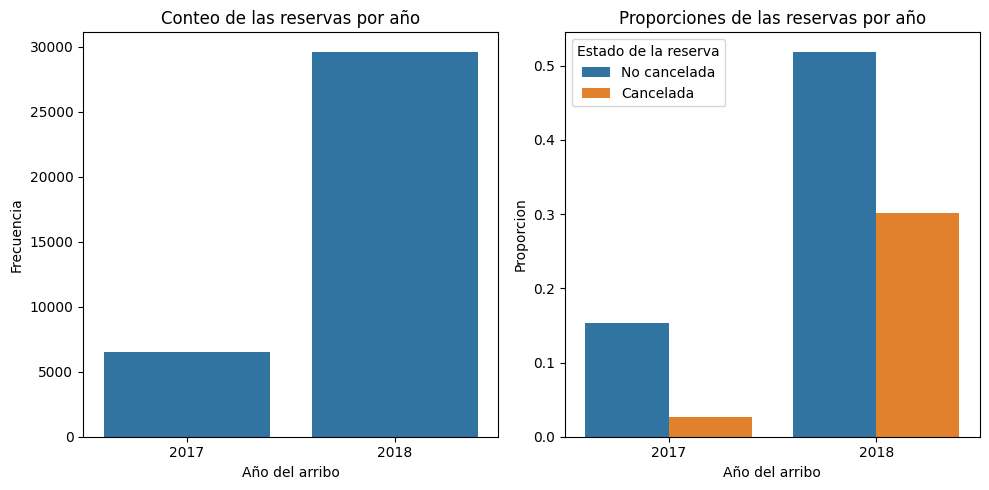

In [27]:
#COMPORTAMIENTO ANUAL DE LAS RESERVAS
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.countplot(x=df.arrival_year,ax=ax[0])
ax[0].set_title('Conteo de las reservas por año')
ax[0].set_xlabel('Año del arribo')
ax[0].set_ylabel('Frecuencia')

sns.countplot(x=df.arrival_year,hue=df.booking_status, stat='proportion', ax=ax[1])
ax[1].set_title('Proporciones de las reservas por año')
ax[1].set_xlabel('Año del arribo')
ax[1].set_ylabel('Proporcion')
ax[1].get_legend().set_title('Estado de la reserva')

plt.tight_layout()
plt.show()

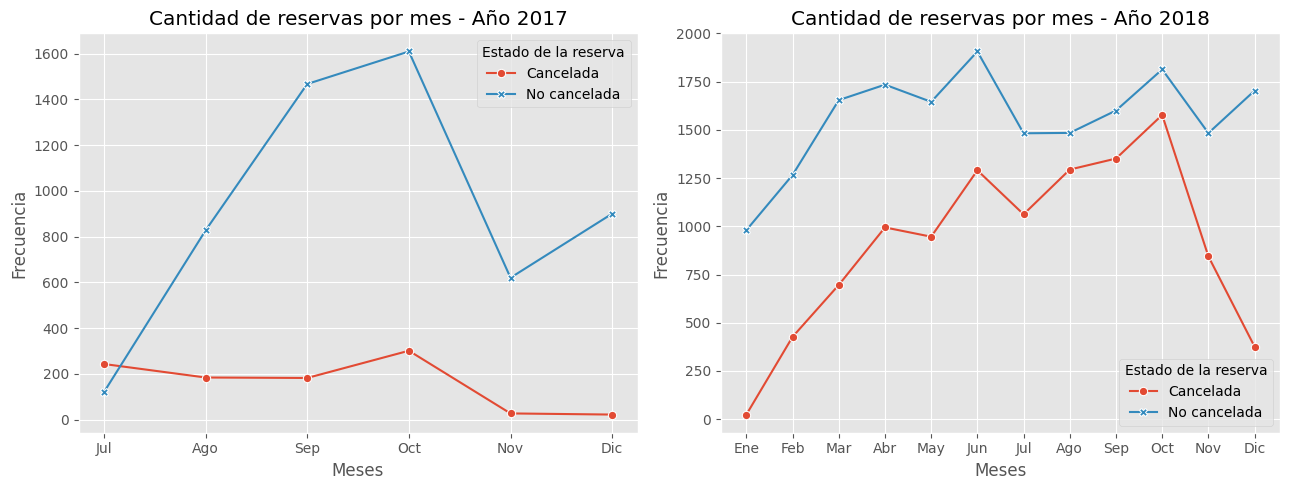

In [28]:
#COMPORTAMIENTO MENSUAL DE LAS RESERVAS
bookings = df.groupby(['arrival_year','arrival_month','booking_status'])['booking_status'].count().reset_index(name='count')
months = ['Ene','Feb','Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

#GRAFICO
mpl.style.use('ggplot')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13,5))

#AÑO 2017
data=bookings.loc[bookings.arrival_year==2017]
sns.lineplot(data=data, x='arrival_month', y='count', hue='booking_status', ax=ax[0], style='booking_status', markers=True, dashes=False)
ax[0].set_title('Cantidad de reservas por mes - Año 2017')
ax[0].set_xlabel('Meses')
ax[0].set_xticks(ticks=data.arrival_month.unique(), labels=months[6:])
ax[0].set_ylabel('Frecuencia')
ax[0].get_legend().set_title('Estado de la reserva')

#AÑO 2018
data=bookings.loc[bookings.arrival_year==2018]
sns.lineplot(data=data, x='arrival_month', y='count', hue='booking_status', ax=ax[1], style='booking_status', markers=True, dashes=False)
ax[1].set_title('Cantidad de reservas por mes - Año 2018')
ax[1].set_xlabel('Meses')
ax[1].set_xticks(ticks=data.arrival_month.unique(), labels=months)
ax[1].set_ylabel('Frecuencia')
ax[1].get_legend().set_title('Estado de la reserva')

plt.tight_layout()
plt.show()
mpl.style.use('default')

#### Distribucion de la variable ***avg_price_room***

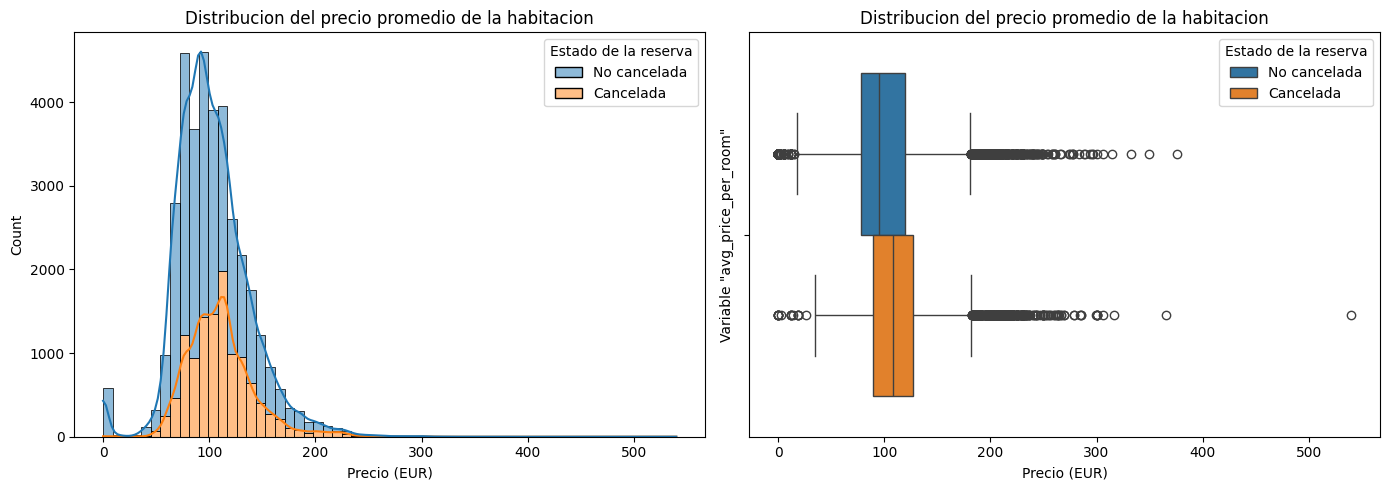

In [29]:
#DISTRIBUCION VARIABLE AVG_PRICE_ROOM
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
sns.histplot(x=df.avg_price_room, hue=df.booking_status, multiple='stack',bins=60, kde=True, ax=ax[0])
ax[0].set_title('Distribucion del precio promedio de la habitacion')
ax[0].set_xlabel('Precio (EUR)')
ax[0].get_legend().set_title('Estado de la reserva')

sns.boxplot(x=df.avg_price_room, hue=df.booking_status, ax=ax[1])
ax[1].set_title('Distribucion del precio promedio de la habitacion')
ax[1].set_xlabel('Precio (EUR)')
ax[1].set_ylabel('Variable "avg_price_per_room"')
ax[1].get_legend().set_title('Estado de la reserva')
plt.tight_layout()
plt.show()

#### Distribucion de la variable ***lead_time***

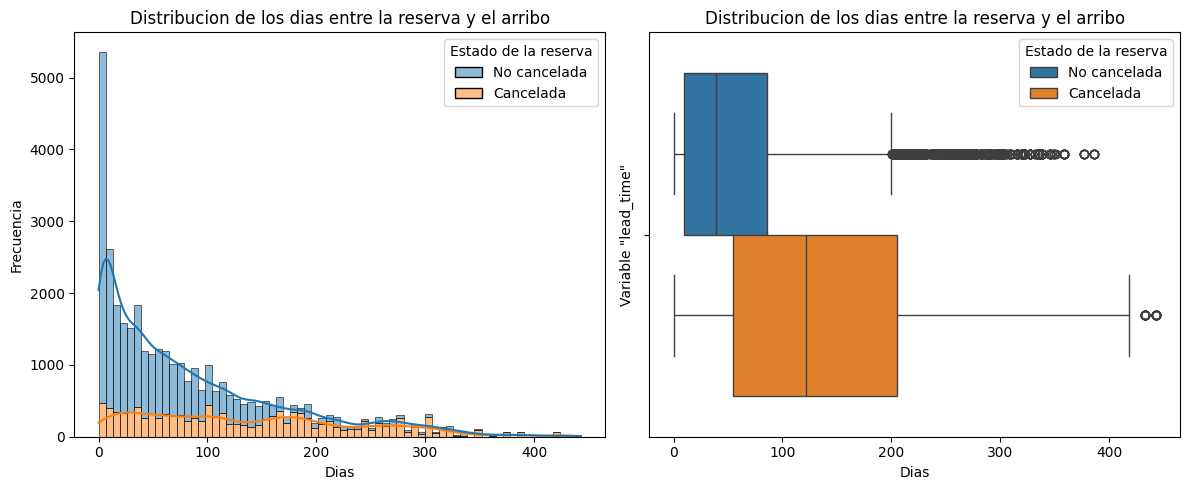

In [30]:
#DISTRIBUCION VARIABLE LEAD_TIME
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(x=df.lead_time, hue=df.booking_status, multiple='stack', kde=True, ax=ax[0])
ax[0].set_title('Distribucion de los dias entre la reserva y el arribo')
ax[0].set_xlabel('Dias')
ax[0].set_ylabel('Frecuencia')
ax[0].get_legend().set_title('Estado de la reserva')

sns.boxplot(x=df.lead_time, hue=df.booking_status, ax=ax[1])
ax[1].set_title('Distribucion de los dias entre la reserva y el arribo')
ax[1].set_xlabel('Dias')
ax[1].set_ylabel('Variable "lead_time"')
ax[1].get_legend().set_title('Estado de la reserva')
plt.tight_layout()
plt.show()

#### Distribucion de la variable ***num_sp_requests***

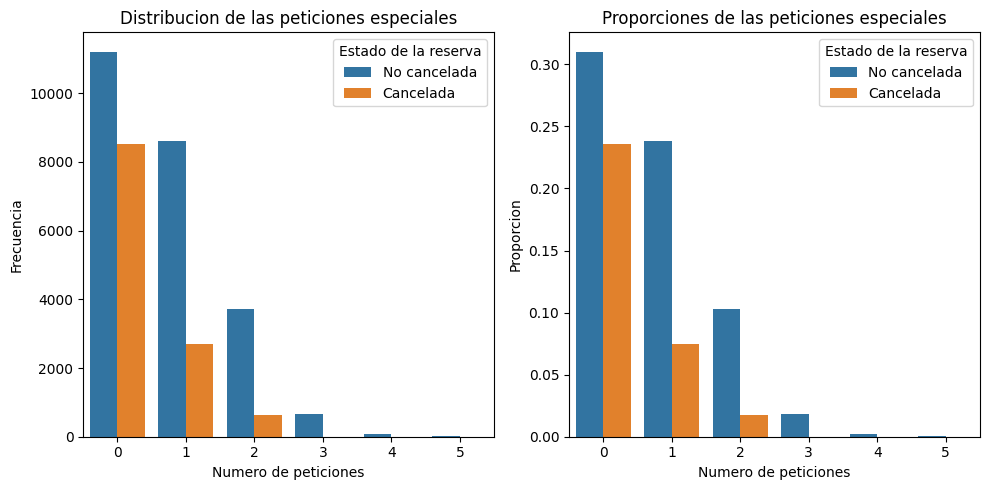

In [31]:
#DISTRIBUCION DE LAS PETICIONES ESPECIALES
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
sns.countplot(x=df.num_sp_requests,ax=ax[0], hue=df.booking_status)
ax[0].set_title('Distribucion de las peticiones especiales')
ax[0].set_xlabel('Numero de peticiones')
ax[0].set_ylabel('Frecuencia')
ax[0].get_legend().set_title('Estado de la reserva')

sns.countplot(x=df.num_sp_requests,hue=df.booking_status, stat='proportion', ax=ax[1])
ax[1].set_title('Proporciones de las peticiones especiales')
ax[1].set_xlabel('Numero de peticiones')
ax[1].set_ylabel('Proporcion')
ax[1].get_legend().set_title('Estado de la reserva')

plt.tight_layout()
plt.show()

#### Distribucion de la variable ***mkt_segment***

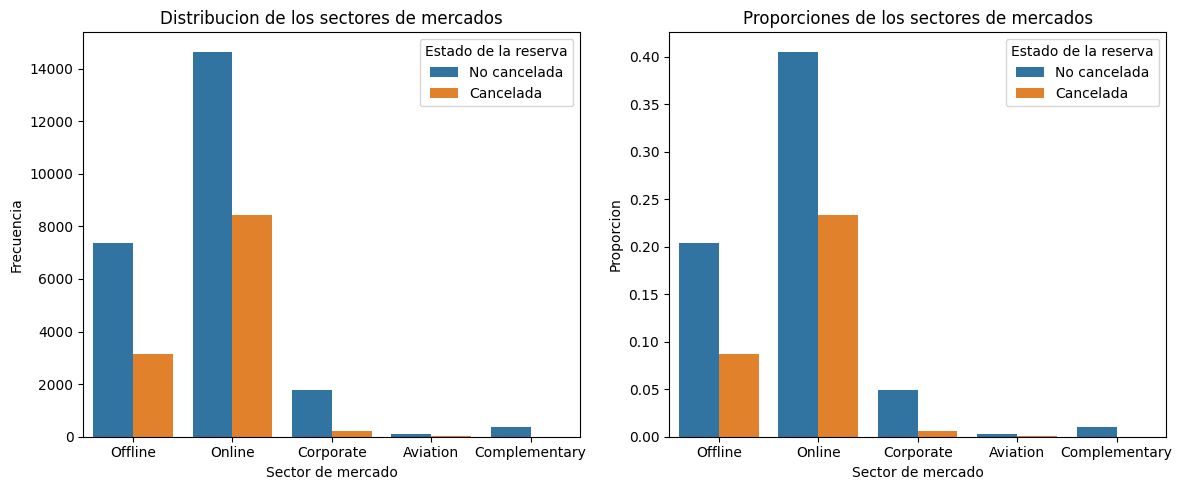

In [32]:
#DISTRIBUCION DE LOS SECTORES DE MERCADO
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(x=df.mkt_segment,ax=ax[0], hue=df.booking_status)
ax[0].set_title('Distribucion de los sectores de mercados')
ax[0].set_xlabel('Sector de mercado')
ax[0].set_ylabel('Frecuencia')
ax[0].get_legend().set_title('Estado de la reserva')

sns.countplot(x=df.mkt_segment,hue=df.booking_status, stat='proportion', ax=ax[1])
ax[1].set_title('Proporciones de los sectores de mercados')
ax[1].set_xlabel('Sector de mercado')
ax[1].set_ylabel('Proporcion')
ax[1].get_legend().set_title('Estado de la reserva')

plt.tight_layout()
plt.show()

#### Analisis bivariado: ***lead_time*** vs ***avg_price_room*** 

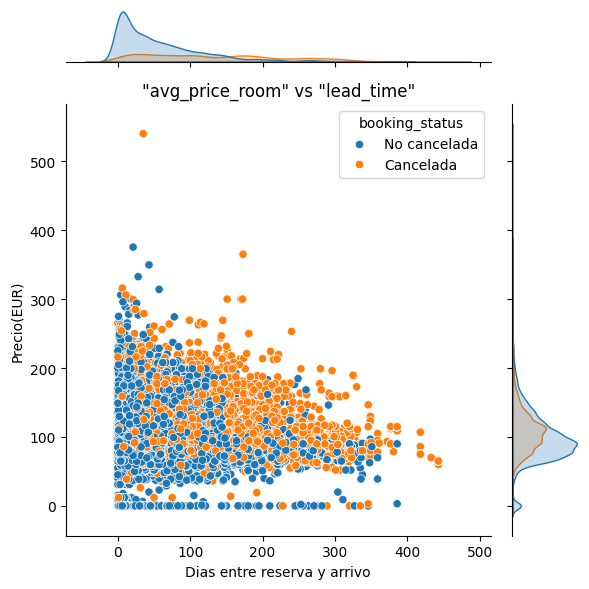

In [33]:
#GRAFICO DE RELACION ENTRE VARIABLES AVG_PRICE_ROOM Y LEAD_TIME
sns.jointplot(x=df.lead_time, y=df.avg_price_room, hue=df.booking_status)
plt.title('"avg_price_room" vs "lead_time"')
plt.ylabel('Precio(EUR)')
plt.xlabel('Dias entre reserva y arrivo')
plt.tight_layout()
plt.show()

#### Analisis bivariado: ***lead_time*** vs ***num_sp_requests***

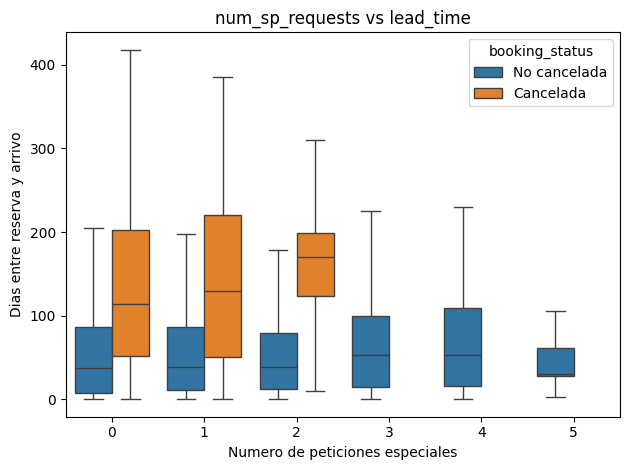

In [34]:
sns.boxplot(y=df.lead_time, x=df.num_sp_requests, hue=df.booking_status, showfliers=False)
plt.title('num_sp_requests vs lead_time')
plt.xlabel('Numero de peticiones especiales')
plt.ylabel('Dias entre reserva y arrivo')
plt.tight_layout()
plt.show()

#### Analisis bivariado: ***lead_time*** vs ***mkt_segment***

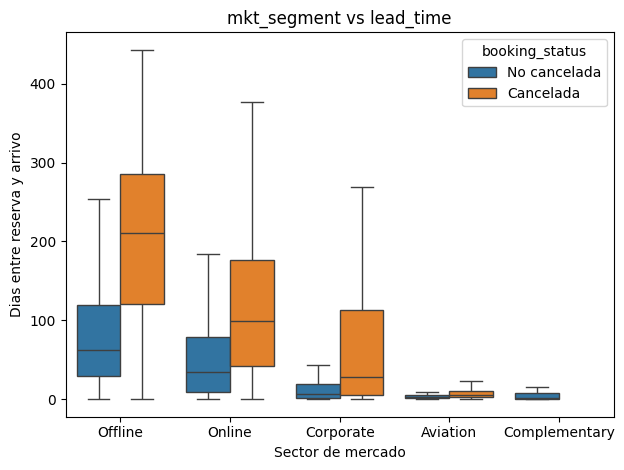

In [35]:
sns.boxplot(y=df.lead_time, x=df.mkt_segment, hue=df.booking_status, showfliers=False)
plt.title('mkt_segment vs lead_time')
plt.xlabel('Sector de mercado')
plt.ylabel('Dias entre reserva y arrivo')
plt.tight_layout()
plt.show()

#### Analisis multivariado: ***avg_price_room*** VS ***lead_time*** VS ***num_sp_requests***

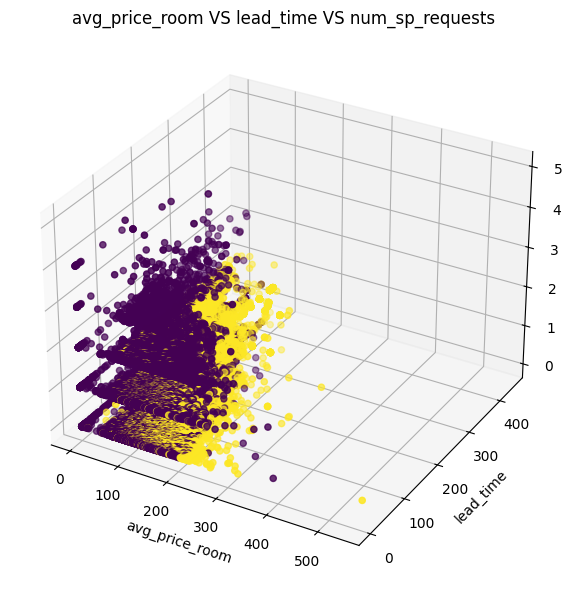

In [47]:
#avg_price_room VS lead_time VS num_sp_requests
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,6))
ax.scatter(df.avg_price_room, df.lead_time, df.num_sp_requests, c=df.booking_status_cod)
ax.set(xlabel='avg_price_room',
       ylabel='lead_time',
       zlabel='num_sp_requests')
plt.title('avg_price_room VS lead_time VS num_sp_requests')
plt.tight_layout()
plt.show()

#### Analisis multivariado: ***avg_price_room*** VS ***lead_time*** VS ***mkt_segment***

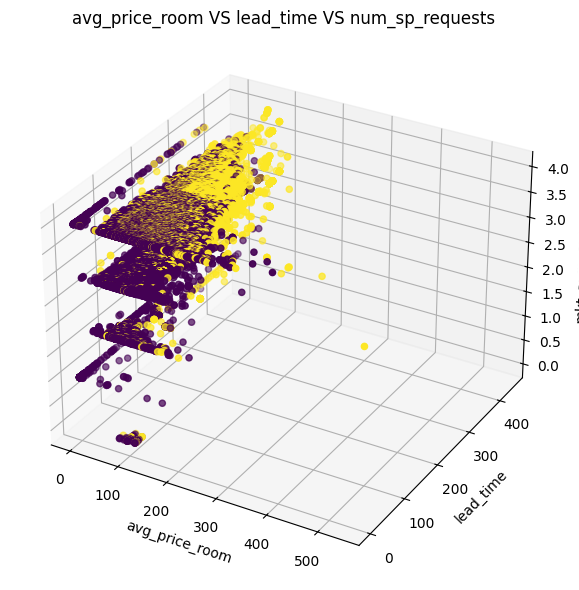

In [49]:
#avg_price_room VS lead_time VS mkt_segment
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,6))
ax.scatter(df.avg_price_room, df.lead_time, df.mkt_segment_cod, c=df.booking_status_cod)
ax.set(xlabel='avg_price_room',
       ylabel='lead_time',
       zlabel='mkt_segment')
plt.title('avg_price_room VS lead_time VS mkt_segment')
plt.tight_layout()
plt.show()